<a href="https://colab.research.google.com/github/RdRandolphCarter/reaprendiendo_Github/blob/main/Labs/Lab%209/practica-9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Configuración del modelo:
EPOCAS: 15	# CAPAS: 3	Neuronas por capa: [1000, 500, 3]	Funcion de activacion: ['relu', 'relu', 'softmax']	Funcion de optimizacion: adam	Taza de aprendizaje: 0.2	Exactitud(%): 0.6000000238418579


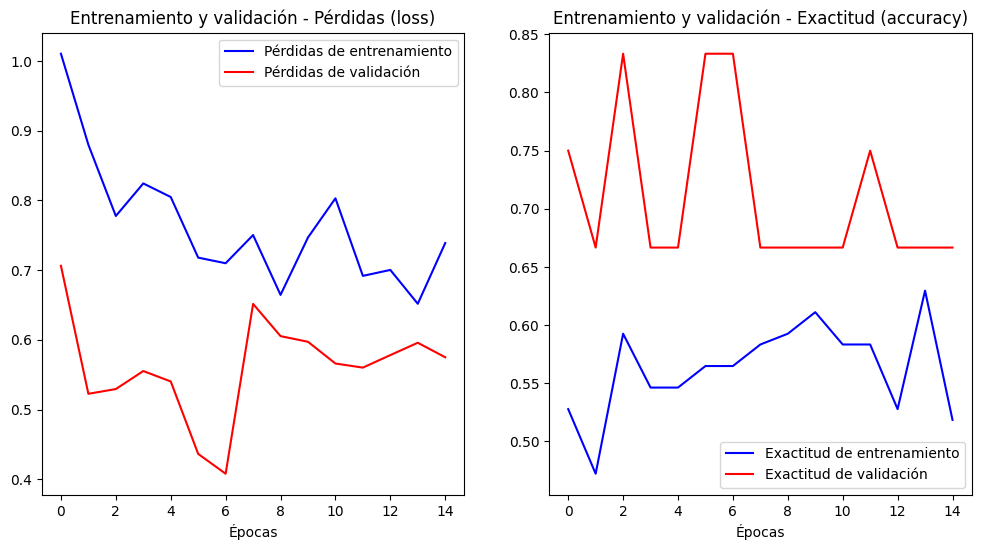


Configuración del modelo:
EPOCAS: 30	# CAPAS: 4	Neuronas por capa: [1500, 1000, 500, 3]	Funcion de activacion: ['relu', 'relu', 'relu', 'softmax']	Funcion de optimizacion: adam	Taza de aprendizaje: 0.2	Exactitud(%): 0.6000000238418579


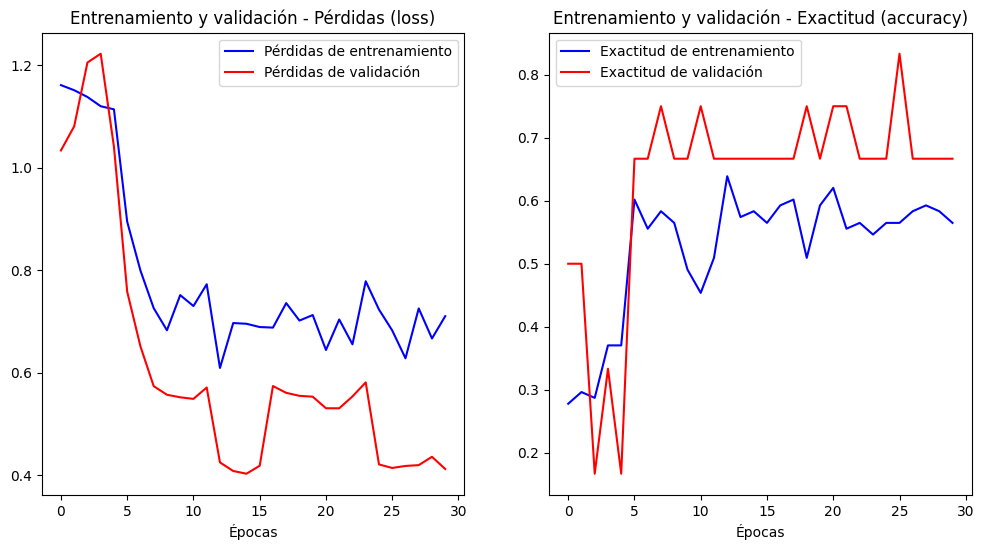


Configuración del modelo:
EPOCAS: 50	# CAPAS: 4	Neuronas por capa: [1500, 1000, 500, 3]	Funcion de activacion: ['softmax', 'softmax', 'softmax', 'softmax']	Funcion de optimizacion: adam	Taza de aprendizaje: 0.3	Exactitud(%): 0.6000000238418579


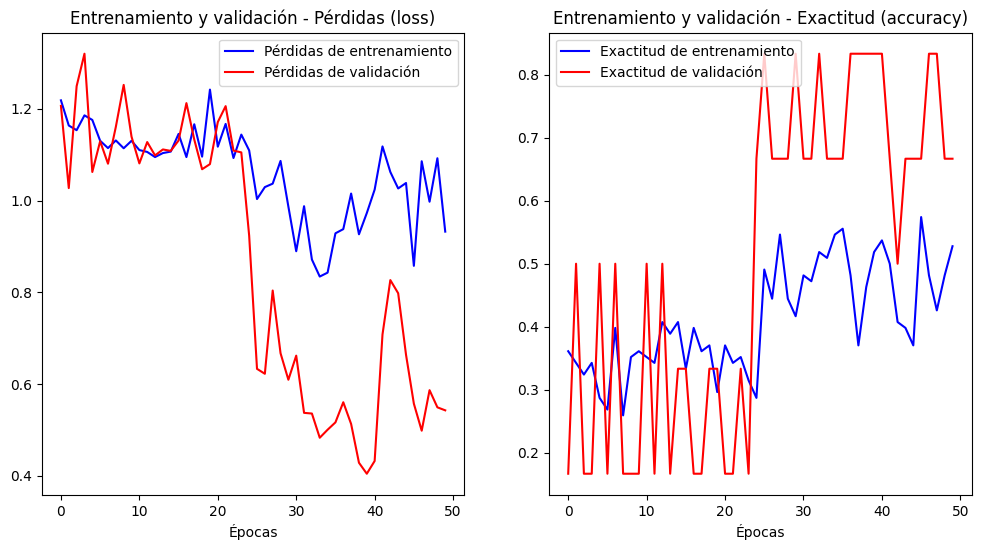


Configuración del modelo:
EPOCAS: 30	# CAPAS: 4	Neuronas por capa: [1000, 600, 300, 3]	Funcion de activacion: ['softmax', 'softmax', 'softmax', 'softmax']	Funcion de optimizacion: adam	Taza de aprendizaje: 0.2	Exactitud(%): 0.8333333134651184


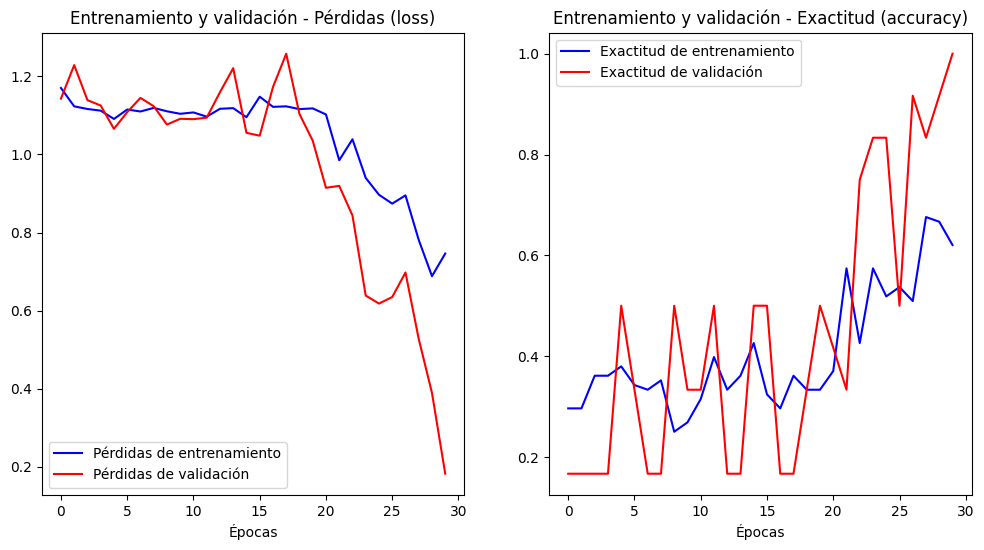


Configuración del modelo:
EPOCAS: 20	# CAPAS: 3	Neuronas por capa: [1000, 500, 3]	Funcion de activacion: ['relu', 'relu', 'softmax']	Funcion de optimizacion: adagrad	Taza de aprendizaje: 0.2	Exactitud(%): 0.30000001192092896


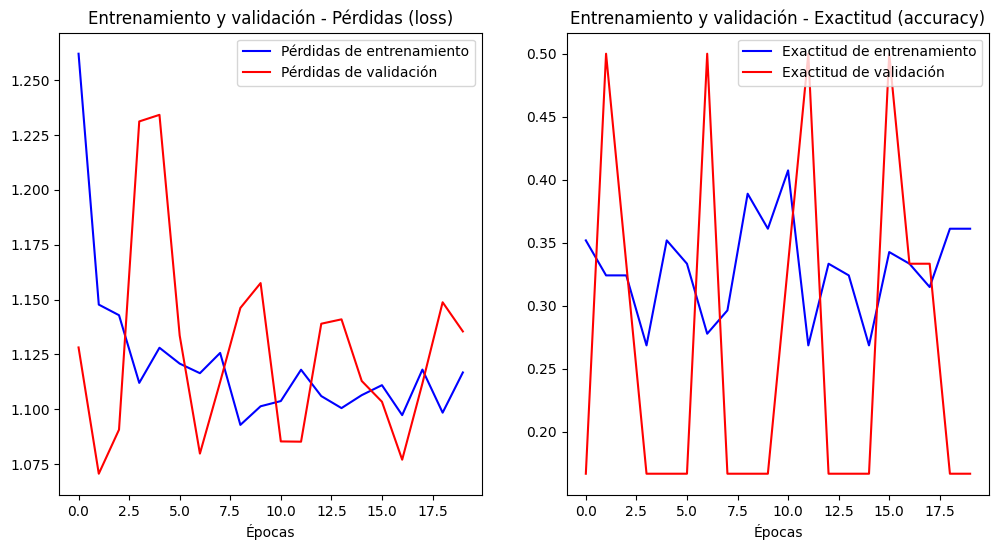

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = load_iris()
features = data["data"]
labels = data["target"]

# Preprocesamiento de datos
input_train, input_test, output_train, output_test = train_test_split(
    features, labels, test_size=0.2)

input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

mean = input_train.mean(axis=0)
input_train -= mean

std = input_train.std(axis=0)
input_train /= std

input_test -= mean
input_test /= std

output_train = tf.keras.utils.to_categorical(output_train, 3)
output_test = tf.keras.utils.to_categorical(output_test, 3)

# Definir función para crear el modelo
def create_model(neurons_per_layer, activation_functions, optimizer, learning_rate):
    model = Sequential()
    for i, neurons in enumerate(neurons_per_layer):
        model.add(Dense(neurons, activation=activation_functions[i], input_shape=(4,)))
        model.add(Dropout(0.3))

    # Agregar capa de salida
    model.add(Dense(3, activation="softmax"))

    # Compilar el modelo
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    return model

# Configuraciones de modelos
configurations = [
    {"epochs": 15, "layers": 3, "neurons_per_layer": [1000, 500, 3], "activation_functions": ['relu', 'relu', 'softmax'], "optimizer": 'adam', "learning_rate": 0.2},
    {"epochs": 30, "layers": 4, "neurons_per_layer": [1500, 1000, 500, 3], "activation_functions": ['relu', 'relu', 'relu', 'softmax'], "optimizer": 'adam', "learning_rate": 0.2},
    {"epochs": 50, "layers": 4, "neurons_per_layer": [1500, 1000, 500, 3], "activation_functions": ['softmax', 'softmax', 'softmax', 'softmax'], "optimizer": 'adam', "learning_rate": 0.3},
    {"epochs": 30, "layers": 4, "neurons_per_layer": [1000, 600, 300, 3], "activation_functions": ['softmax', 'softmax', 'softmax', 'softmax'], "optimizer": 'adam', "learning_rate": 0.2},
    {"epochs": 20, "layers": 3, "neurons_per_layer": [1000, 500, 3], "activation_functions": ['relu', 'relu', 'softmax'], "optimizer": 'adagrad', "learning_rate": 0.2},
]

# Entrenamiento y evaluación de modelos
for config in configurations:
    model = create_model(
        config["neurons_per_layer"],
        config["activation_functions"],
        config["optimizer"],
        config["learning_rate"]
    )

    history = model.fit(input_train, output_train, epochs=config["epochs"], validation_split=0.1, verbose=0)

    # Evaluar el modelo en el conjunto de prueba
    score = model.evaluate(input_test, output_test, verbose=0)

    # Imprimir resultados
    print(f"\nConfiguración del modelo:")
    print(f"EPOCAS: {config['epochs']}\t# CAPAS: {config['layers']}\tNeuronas por capa: {config['neurons_per_layer']}\t"
          f"Funcion de activacion: {config['activation_functions']}\tFuncion de optimizacion: {config['optimizer']}\t"
          f"Taza de aprendizaje: {config['learning_rate']}\tExactitud(%): {score[1]}")

    # Visualización de las gráficas de pérdida y precisión
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    epochs = range(len(loss))

    f, axarr = plt.subplots(1, 2, figsize=(12, 6))
    p0 = axarr[0]
    p1 = axarr[1]

    p0.set_title("Entrenamiento y validación - Pérdidas (loss)")
    p0.set_xlabel('Épocas')
    p1.set_title("Entrenamiento y validación - Exactitud (accuracy)")
    p1.set_xlabel('Épocas')

    p0l0 = p0.plot(epochs, loss, "-b", label="Pérdidas de entrenamiento")
    p0l1 = p0.plot(epochs, val_loss, "-r", label="Pérdidas de validación")

    p1l0 = p1.plot(epochs, acc, "-b", label="Exactitud de entrenamiento")
    p1l1 = p1.plot(epochs, val_acc, "-r", label="Exactitud de validación")

    legend0 = p0.legend()
    legend1 = p1.legend()

    plt.show()

